In [1]:
import localgraphclustering as lgc
import numpy as np

import matplotlib.pyplot as plt


import sys
import os
sys.path.insert(0, os.path.join("..", "LocalGraphClustering", "notebooks"))
import helper
from functools import partial



There are  1  connected components in the graph


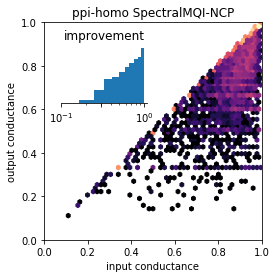

In [2]:
def run_local_fiedler_ncp(g, gname):
    ratio = 1.0
    if g._num_vertices > 1000000:
        ratio = 0.05
    elif g._num_vertices > 100000:
        ratio = 0.1
    elif g._num_vertices > 10000:
        ratio = 0.4
    elif g._num_vertices > 7500:
        ratio = 0.6
    elif g._num_vertices > 5000:
        ratio = 0.8
    ncp = lgc.NCPData(g)
    
    func = partial(lgc.spectral_clustering,method="fiedler_local")
    ncp.add_random_neighborhood_samples(ratio=ratio,
                method=func,methodname="local_fiedler")
    
    fig = lgc.NCPPlots(ncp).mqi_input_output_cond_plot()[0]
    fig.axes[0].set_title(gname + " SpectralMQI-NCP")
    fig.savefig("figures/local-fiedler-ncp-"+gname+".pdf", bbox_inches="tight", figsize=(3,3))
    plt.show()
    
for gname in ["ppi-homo"]:
    g = helper.lgc_data(gname)
    g.discard_weights()
    run_local_fiedler_ncp(g, gname)

There are  1  connected components in the graph


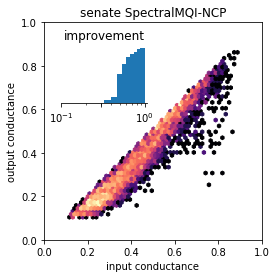

There are  1  connected components in the graph


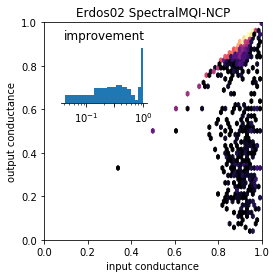

There are  24  connected components in the graph


/home/dgleich/.local/lib/python3.5/site-packages/localgraphclustering/GraphLocal.py:535: UserWarning:

The graph has multiple (24) components, using the largest with 5157 / 5180 nodes



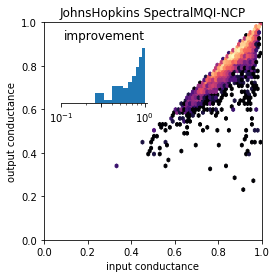

/home/dgleich/.local/lib/python3.5/site-packages/localgraphclustering/GraphLocal.py:203: UserWarning:

Loading a graphml is not efficient, we suggest using an edgelist format for this API.



There are  1  connected components in the graph


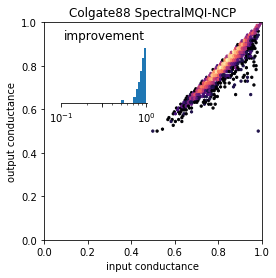

There are  1  connected components in the graph


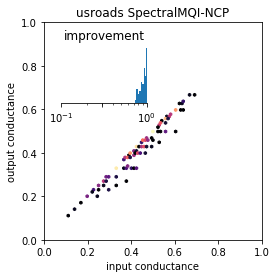

There are  1  connected components in the graph


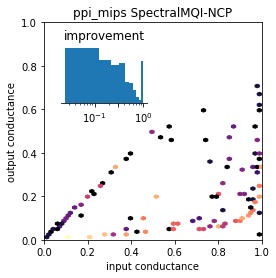

There are  1  connected components in the graph


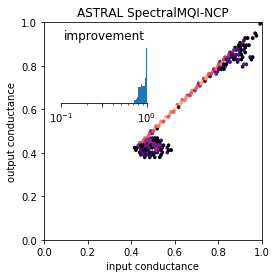

There are  1  connected components in the graph


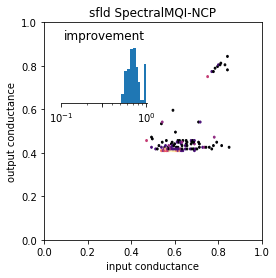

There are  1  connected components in the graph


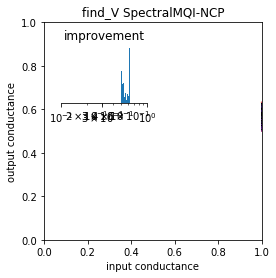

There are  1  connected components in the graph


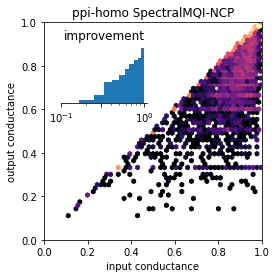

There are  738  connected components in the graph


/home/dgleich/.local/lib/python3.5/site-packages/localgraphclustering/GraphLocal.py:535: UserWarning:

The graph has multiple (738) components, using the largest with 5725 / 6476 nodes



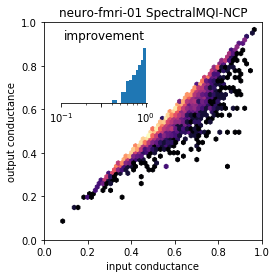

There are  1  connected components in the graph


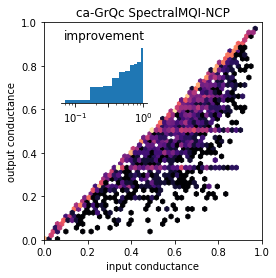

In [3]:
for gname in helper.lgc_graphlist:
    g = helper.lgc_data(gname)
    g.discard_weights()
    run_local_fiedler_ncp(g, gname)

astro-spectra ('lawlor-spectra-k32.edgelist.gz', '\t')
There are  1  connected components in the graph


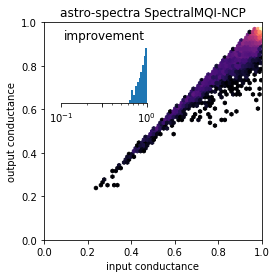

livejournal soc-LiveJournal-scc.edges.gz
There are  1  connected components in the graph


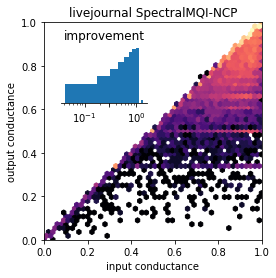

wiki-cats wiki-cats.edges
There are  16292  connected components in the graph


/home/dgleich/.local/lib/python3.5/site-packages/localgraphclustering/GraphLocal.py:535: UserWarning:

The graph has multiple (16292) components, using the largest with 159103 / 176056 nodes



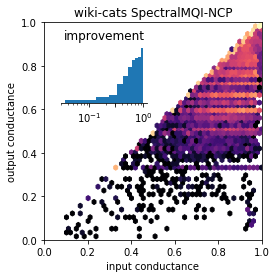

netscience netscience-cc.edges
There are  1  connected components in the graph


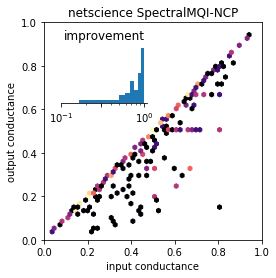

email-Enron email-Enron.edges.gz
There are  1  connected components in the graph


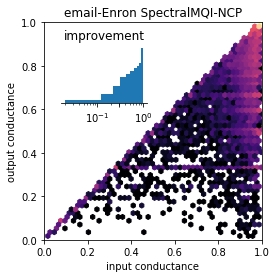

pokec soc-pokec.edges.gz
There are  1  connected components in the graph


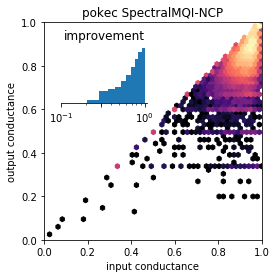

digits-1234-3 digits-1234-3.edges
There are  1  connected components in the graph


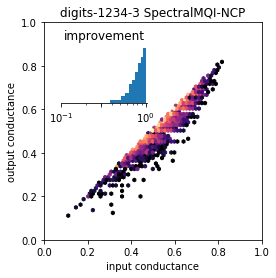

neurosynth neurosynth-meta.edges.gz
There are  1  connected components in the graph


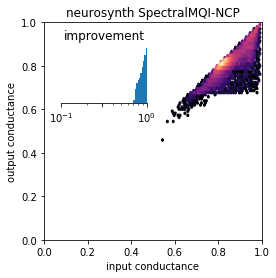

In [32]:
mygraphs = {'digits-1234-3':'digits-1234-3.edges', 
            'neurosynth':'neurosynth-meta.edges.gz',
            'wiki-cats':'wiki-cats.edges', 
            'pokec':'soc-pokec.edges.gz',
            'livejournal':'soc-LiveJournal-scc.edges.gz',
            'astro-spectra':('lawlor-spectra-k32.edgelist.gz','\t'),
            'email-Enron':'email-Enron.edges.gz',
            'netscience':'netscience-cc.edges'
           }

for (gname,gfile) in mygraphs.items():
    print(gname, gfile)
    sep = ' '
    if isinstance(gfile, tuple):
        sep = gfile[1]
        gfile = gfile[0]
    g = lgc.GraphLocal(os.path.join("..", "data", gfile),
                                 'edgelist', sep)
    g.discard_weights()
    
    run_local_fiedler_ncp(g, gname)
